## SWE Analysis over Sierra Nevada Range using four models for a given season

SWE: Snow Water Equivalence

In [49]:
import math

import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [50]:
# SWE wrf datasets
ds_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.swe.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.swe.2091-2100.nc')

# SWE loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.swe.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.swe.2091-2100.nc')

# SWE _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.swe.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.swe.2091-2100.nc')

# SWE _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.swe.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.swe.2091-2100.nc')

In [51]:
# Export to pandas and check for not null values
#ds_wrf_1980['swe']
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['swe'].notnull()]
ds_wrf_1980

<xarray.Dataset>
Dimensions:         (latitude: 128, longitude: 112, nb2: 2, time: 396)
Coordinates:
  * longitude       (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude        (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time            (time) datetime64[ns] 1980-01-31 1980-02-29 1980-03-31 ...
Dimensions without coordinates: nb2
Data variables:
    longitude_bnds  (longitude, nb2) float32 ...
    latitude_bnds   (latitude, nb2) float32 ...
    swe             (time, latitude, longitude) float32 ...
Attributes:
    CDI:                Climate Data Interface version 1.6.1 (http://code.zma...
    Conventions:        GDT 1.2
    history:            Fri Jan 19 21:19:00 2018: cdo -O monavg /data5/emaure...
    institution:        DOE, Santa Clara University
    file_name:          DOE_VIC.narr_wrf.daily.swe.1980.nc
    History:            Archived 2017
    authors:            Maurer, E., SCU
    description:        Daily VIC Output
    creation_date: 

In [64]:
swe_wrf_from_1991 = ds_wrf_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))
swe_loca_wrf_from_1991 = ds_loca_wrf_1980['swe'].sel(time=slice('1991-01-01','2000-12-31'))
swe_loca_14_from_1991 = ds_loca_14_1980['swe'].sel(time=slice('1991-01-01','2000-12-31'))
swe_bcsd_L14_from_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))

# Enter the season you want 
season_str = 'MAM'
# TODO: Add function to request month or season parameters
str_groupby = 'time.season'
cbar_range_past = set()
cbar_range_future = set()
cbar_range_diff = set()
def add_to_cbar(ds, var_str ,cbar_set):
    get_df = ds.to_dataframe()
    cbar_set.add(get_df[var_str].min())
    cbar_set.add(get_df[var_str].max())


### Mean difference of narr_wrf

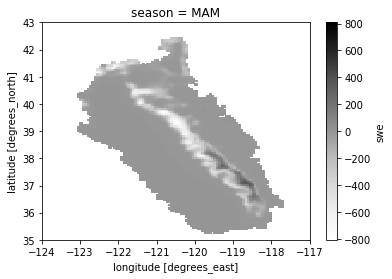

In [65]:

swe_wrf_1991 = swe_wrf_from_1991.groupby(str_groupby).mean('time')
swe_wrf_2091 = ds_wrf_2091['swe'].groupby(str_groupby).mean('time')
add_to_cbar(swe_wrf_1991, 'swe', cbar_range_past)
add_to_cbar(swe_wrf_2091, 'swe', cbar_range_future)
mean_diff_wrf_1991_2091 = (swe_wrf_2091.sel(season=season_str) - swe_wrf_1991.sel(season=season_str))  
add_to_cbar(mean_diff_wrf_1991_2091, 'swe', cbar_range_diff)
mean_diff_wrf_1991_2091.plot(cmap='Greys')

### Mean difference of narr_loca_wrf

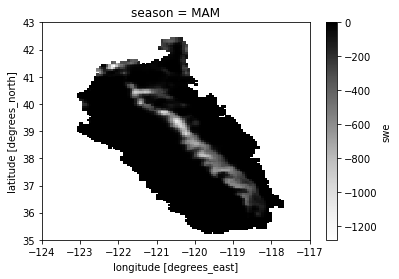

In [66]:
swe_loca_wrf_1991 = swe_loca_wrf_from_1991.groupby(str_groupby).mean('time')
swe_loca_wrf_2091 = ds_loca_wrf_2091['swe'].groupby(str_groupby).mean('time')
add_to_cbar(swe_loca_wrf_1991, 'swe', cbar_range_past)
add_to_cbar(swe_loca_wrf_2091, 'swe', cbar_range_future)
mean_diff_loca_wrf_1991_2091 = (swe_loca_wrf_2091.sel(season=season_str) - swe_loca_wrf_1991.sel(season=season_str))
add_to_cbar(mean_diff_loca_wrf_1991_2091, 'swe', cbar_range_diff)
mean_diff_loca_wrf_1991_2091.plot(cmap='Greys')

### Mean difference of narr_loca_14

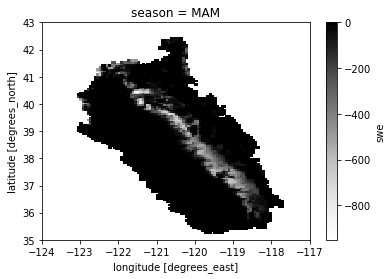

In [67]:
swe_loca_14_1991 = swe_loca_14_from_1991.groupby(str_groupby).mean('time')
swe_loca_14_2091 = ds_loca_14_2091['swe'].groupby(str_groupby).mean('time')
add_to_cbar(swe_loca_14_1991, 'swe', cbar_range_past)
add_to_cbar(swe_loca_14_2091, 'swe', cbar_range_future)

mean_diff_loca_14_1991_2091 = ((swe_loca_14_2091.sel(season=season_str) - swe_loca_14_1991.sel(season=season_str)))
add_to_cbar(mean_diff_loca_14_1991_2091, 'swe', cbar_range_diff)
mean_diff_loca_14_1991_2091.plot(cmap='Greys')

### Mean difference of narr_bcsd_L14

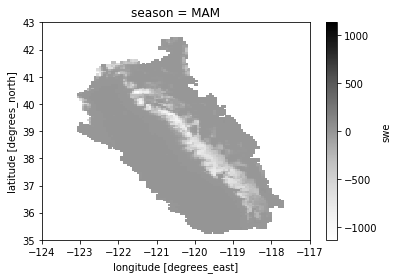

In [68]:
swe_bcsd_L14_1991 = swe_bcsd_L14_from_1991.groupby(str_groupby).mean('time')
swe_bcsd_L14_2091 = ds_bcsd_L14_2091['swe'].groupby(str_groupby).mean('time')
add_to_cbar(swe_bcsd_L14_1991, 'swe', cbar_range_past)
add_to_cbar(swe_bcsd_L14_2091, 'swe', cbar_range_future)


mean_diff_bcsd_L14_1991_2091 = (swe_loca_14_2091.sel(season=season_str) - swe_bcsd_L14_1991 .sel(season=season_str))
mean_diff_bcsd_L14_1991_2091.plot(cmap='Greys')
add_to_cbar(mean_diff_bcsd_L14_1991_2091, 'swe', cbar_range_diff)

In [69]:
cbar_range_past

{0.0, 1703.3741, 1703.4427, 1722.4713, 2036.1313}

In [70]:
cbar_range_future

{0.0, 689.0617, 1377.9559, 1466.502, 1586.9468}

In [71]:
cbar_range_diff

{-1282.883, -1130.6224, -951.4187, -808.04315, 0.0, 1.689708e-05, 381.03223}

In [72]:
# Helper function to setup clim for colorbar
# Get max and min and setup ceiling:
#   - by next fifth multiple if number 
#              has more than two digits
#   - else by 1
def setup_clim(ls):
    
    if(max(ls) < 0):
        return (math.floor(min(ls)), math.ceil(max(ls)))
    if(min(ls) < 0):
        if(abs(min(ls)) < max(ls)):
            if (len(str(abs(max(ls))).split('.')[0]) < 2):
                return (math.ceil(-max(ls)), math.ceil(max(ls)))
            else:
                return (math.floor(-max(ls)/5)*5, math.ceil(max(ls)/5)*5)
        else:
            if (len(str(abs(min(ls))).split('.')[0]) < 2):
                return (math.floor(min(ls)), math.ceil(-min(ls)))
            else:
                return (math.floor(min(ls)/5)*5, math.ceil(-min(ls)/5)*5)
    else:
        if (len(str(abs(max(ls))).split('.')[0]) < 2):
            return (math.floor(min(ls)), math.ceil(max(ls)))
        else:
            return (math.floor(min(ls)/5)*5, math.ceil(max(ls)/5)*5)
    

In [73]:
def add_to_cbar(ds, var_str, cbar_set):
    get_df = ds.to_dataframe()
    cbar_set.add(get_df[var_str].min())
    cbar_set.add(get_df[var_str].max())

## Multi-plots

{0.0, 1.689708e-05, -951.4187, -1130.6224, -808.04315, 381.03223, -1282.883}
(-1285, 1285)


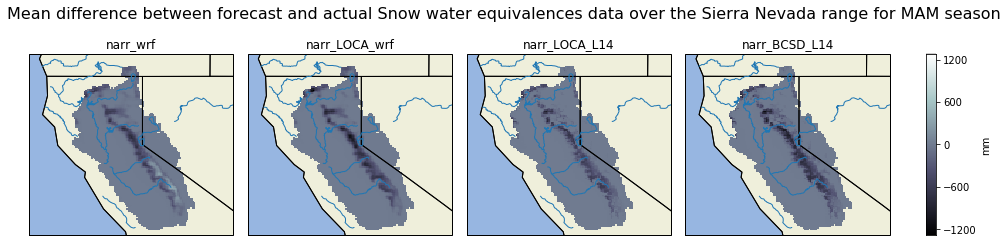

In [74]:
# figsize=(18, 8)
#fig, axes = plt.subplots(nrows=1, ncols=4 )



mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad = 0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5,
                label_mode='',
                share_all=True
                
               )
cbar_label_title = 'mm'

cbar_range_mean_diff = set()
for ls in mean_list: 
    add_to_cbar(ls, 'swe', cbar_range_mean_diff)
print(cbar_range_mean_diff)
test = setup_clim(cbar_range_mean_diff)
print(test)

for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')    
    test_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap='bone', add_colorbar=False)
    test_plt.set_clim(setup_clim(cbar_range_mean_diff))
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

#make_axes_area_auto_adjustable(axgr[0], pad=0.2, use_axes=[axgr[0], axgr[1], axgr[2], axgr[3]])
fig.subplots_adjust(left=0.06, top=1.64)
fig.suptitle('Mean difference between forecast and actual Snow water equivalences data over the Sierra Nevada range for {0} season'.format(season_str), fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(test_plt)
cb.set_label_text(cbar_label_title)

fig.savefig('SWE Mean Difference during {0} over Sierra Nevada range.png'.format(season_str), dpi=150, bbox_inches="tight")


### Seasonal variation of SWE over Sierra Nevada Range

(0, 1590)


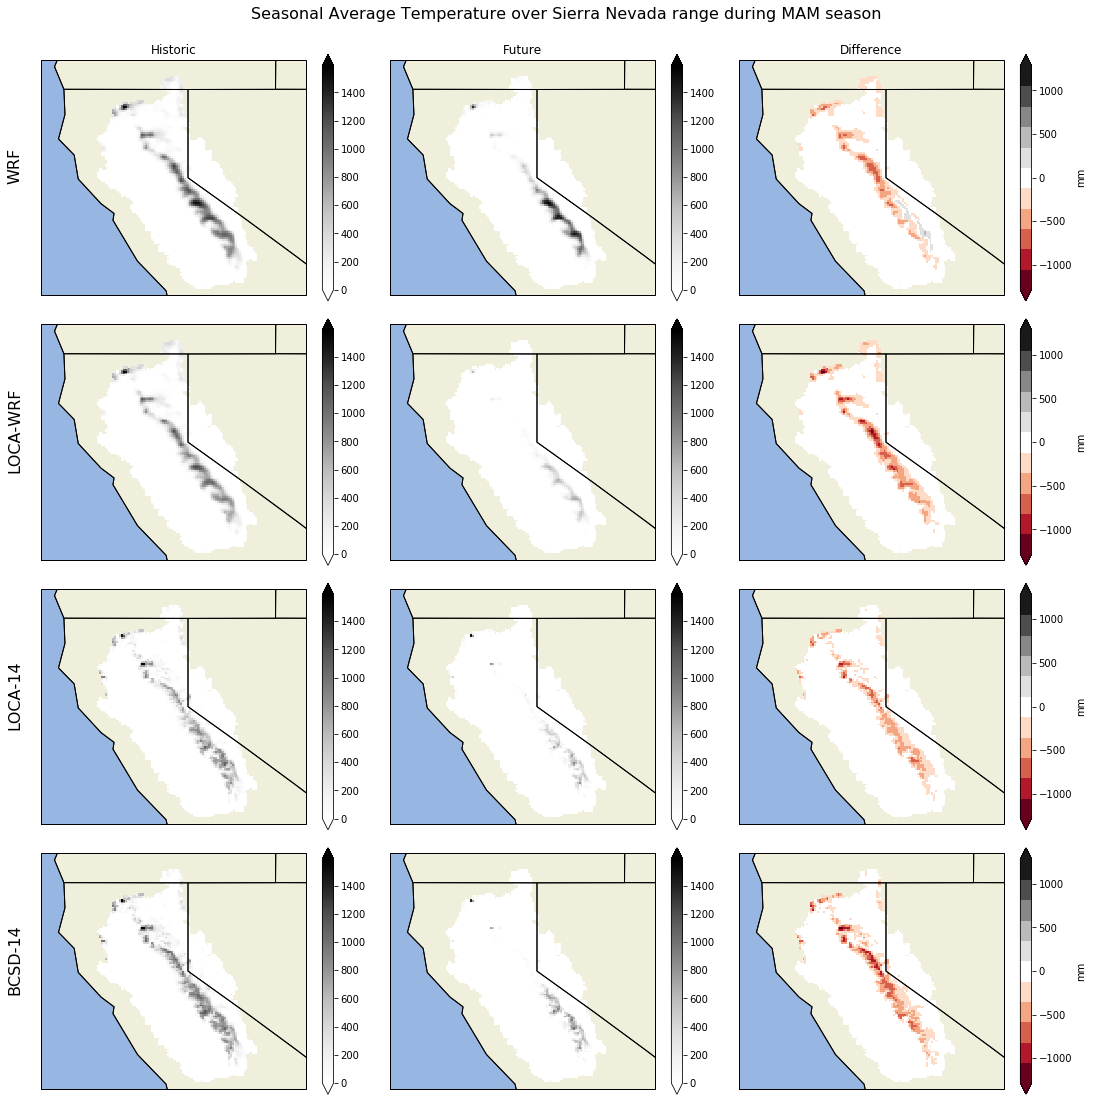

In [79]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

cbar_range_past = set()
cbar_range_future = set()
cbar_range_diff = set()
def add_to_cbar(ds, var_str ,cbar_set):
    get_df = ds.to_dataframe()
    cbar_set.add(get_df[var_str].min())
    cbar_set.add(get_df[var_str].max())


# TODO: Refactor this code for any climate variable
season_str = 'MAM'
cbar_label_title = 'mm'
cbar_color = 'Greys'

# Historic Mean Temperature, 1991-01-01 to 2000-12-31
past_mean = [
    swe_wrf_1991.sel(season=season_str), 
    swe_loca_wrf_1991.sel(season=season_str),
    swe_loca_14_1991.sel(season=season_str),
    swe_bcsd_L14_1991.sel(season=season_str)
]

# Future Mean Temperature
future_mean = [
    swe_wrf_2091.sel(season=season_str),
    swe_loca_wrf_2091.sel(season=season_str),
    swe_loca_14_2091.sel(season=season_str),
    swe_bcsd_L14_2091.sel(season=season_str)
]

# cbar range calculations
for i in range(len(past_mean)):
    add_to_cbar(past_mean[i], 'swe', cbar_range_past)
    add_to_cbar(future_mean[i], 'swe', cbar_range_future)
    diff_calc = future_mean[i] - past_mean[i]
    add_to_cbar(diff_calc, 'swe', cbar_range_diff)

clim_future_past = max([setup_clim(cbar_range_future), setup_clim(cbar_range_past)], key=lambda t: abs(t[0]))
print(clim_future_past)

models = ('WRF', 'LOCA-WRF', 'LOCA-14', 'BCSD-14')
for i, model in enumerate(models):
    # Historic mean plot
    past_plot = past_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 0], extend='both', add_labels=False)
    past_plot.set_clim(clim_future_past)
    # Future mean plot
    future_plot = future_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 1], extend='both', add_labels=False)
    future_plot.set_clim(clim_future_past)
    # Difference plot
    diff_plot = future_mean[i] - past_mean[i]
    diff_plot = diff_plot.plot(cmap=plt.get_cmap('RdGy', 11), ax=axes[i, 2], extend='both', cbar_kwargs={'label': cbar_label_title})
    diff_plot.set_clim(setup_clim(cbar_range_diff))
    # Only add titles to the first row of these graphs
    if i > 0:
        axes[i, 0].set_title("")
        axes[i, 1].set_title("")
        axes[i, 2].set_title("")
  
axes[0, 0].set_title('Historic')
axes[0, 1].set_title('Future')
axes[0, 2].set_title('Difference')
my_suptitle = fig.suptitle('Seasonal Average Temperature over Sierra Nevada range during {0} season'.format(season_str), 
                           fontsize=16, 
                           y=1.02)

counter = 0
for i, ax in enumerate(axes.flat):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    ax.set_extent([-125, -116, 43, 35])
    if(i == 0 or i % 3 == 0):
        ax.text(-0.07, 0.55, '{0}'.format(models[counter]), va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes, fontsize=16)
        counter = counter + 1
    
plt.tight_layout()
fig.savefig('SWE during {0} over Sierra Nevada range.png'.format(season_str), dpi=150, bbox_inches="tight")


In [32]:
cbar_range_diff

{-560.1366,
 -552.5606,
 -427.832,
 -390.99338,
 45.231415,
 119.26004,
 144.2901,
 192.37665}

In [33]:
cbar_range_past

{0.0, 831.3433, 837.41626, 961.5009, 1214.3931}

In [34]:
cbar_range_future

{0.0, 418.14566, 722.5537, 763.542, 842.0522}